In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# df = pd.read_csv('/content/Data(Sheet1).csv')
# print(df.head())

# print("DataSet Shape")
# print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# print("\nDataset Info")
# print(df.info())

# print("\nSummary Statistics")
# print(df.describe(include='all'))

# print("\nMissing values")
# print(df.isnull().sum())


Predict your result
Enter your study hours: 5
Enter your attendance: 70
Enter your sleep hours: 4
Enter your past scores: 60
Your result is: Passed


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


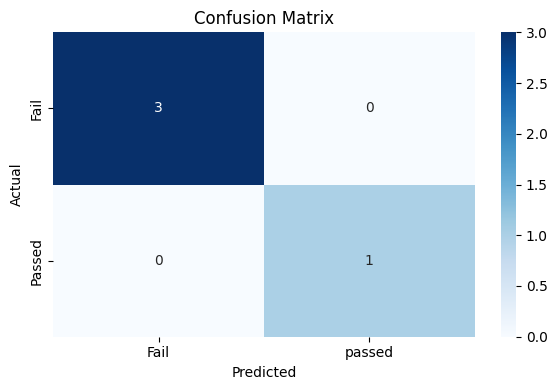

In [14]:
df = pd.read_csv('/content/Data(Sheet1).csv')

# print("\nMissing values")
# print(df.isnull().sum())

le = LabelEncoder()
df['Internet'] = le.fit_transform(df["Internet"])
df['Passed'] = le.fit_transform(df["Passed"])

features = ['StudyHours', 'Attendance', 'PastScore', 'SleepHours']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

X = df_scaled[features]
y = df_scaled["Passed"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# print("Classification report")
# print(classification_report(y_test, y_pred))

# conf_matrix = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(6, 4))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Fail", "passed"], yticklabels=["Fail", "Passed"])
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.tight_layout()
# plt.show()

print("Predict your result")

try:
  study_hours = float(input("Enter your study hours: "))
  attendance = float(input("Enter your attendance: "))
  sleep_hours = float(input("Enter your sleep hours: "))
  past_score = float(input("Enter your past scores: "))

  user_input_df = pd.DataFrame([{
      'StudyHours': study_hours,
      'Attendance': attendance,
      'PastScore': past_score,
      'SleepHours': sleep_hours
  }])

  user_input_scaler = scaler.transform(user_input_df)
  user_input_pred = model.predict(user_input_scaler)[0]

  result = "Passed" if user_input_pred == 1 else "Fail"
  print(f"Your result is: {result}")
except Exception as e:
  print(f"Error: {e}")